Install Yahoo Finance

In [77]:
!pip install -q yfinance

Import relevant libraries

In [78]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr



In [79]:
yf.pdr_override()

#for the timestamps
from datetime import datetime

#The tech stocks used
tech_list= ['AAPL', 'GOOG', 'TSLA', 'AMZN']

#End and start times for data grab
end= datetime.now()
start= datetime(end.year -1, end.month, end.day)

for stock in tech_list :
  globals()[stock] = yf.download(stock, start, end)

company_list= [AAPL, GOOG, TSLA, AMZN]
company_name = ["APPLE", "GOOGLE", "TESLA", "AMAZON" ]

for company, com_name in zip(company_list, company_name) :
  company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-06,125.070000,127.400002,125.000000,126.610001,126.610001,45695200,AMAZON
2023-06-07,127.010002,127.370003,120.629997,121.230003,121.230003,95663300,AMAZON
2023-06-08,123.010002,125.629997,122.260002,124.250000,124.250000,62159300,AMAZON
2023-06-09,124.080002,125.800003,123.190002,123.430000,123.430000,51330000,AMAZON
2023-06-12,124.019997,126.779999,123.529999,126.570000,126.570000,51338000,AMAZON
2023-06-13,128.119995,128.410004,125.180000,126.660004,126.660004,50564800,AMAZON
2023-06-14,126.699997,126.949997,124.120003,126.419998,126.419998,52422500,AMAZON
2023-06-15,125.209999,127.690002,124.320000,127.110001,127.110001,60458500,AMAZON
2023-06-16,127.709999,127.900002,125.300003,125.489998,125.489998,84188100,AMAZON


Finding the closing price( last price which the stock is traded during the regular trading day)

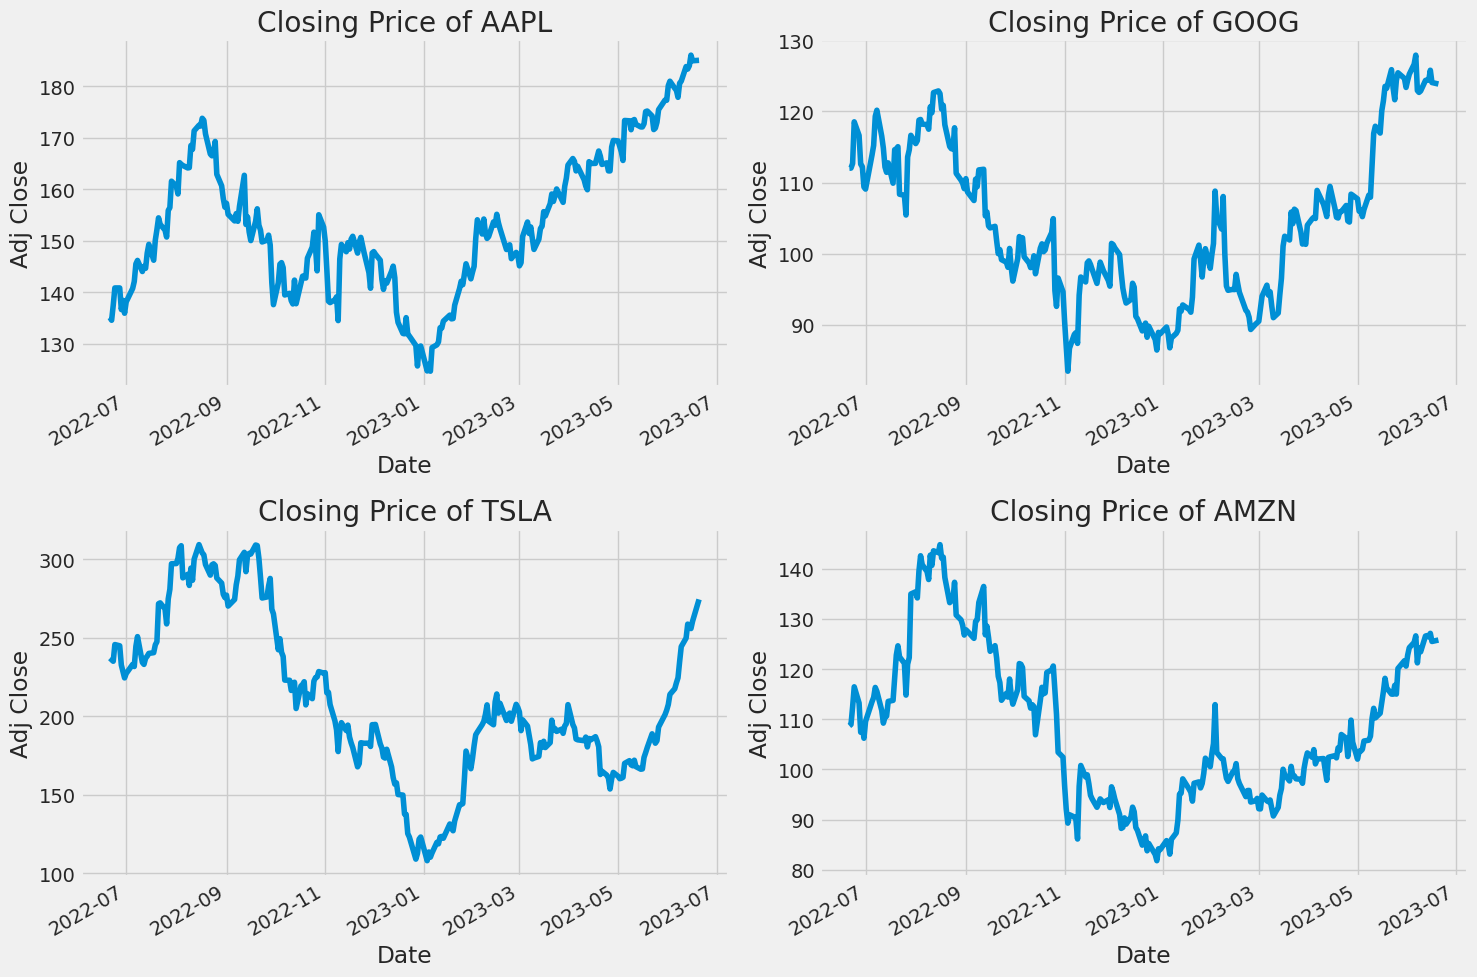

In [80]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.title(f"Closing Price of {tech_list[i-1]}")

plt.tight_layout()

Moving average (smooths out price data by creating a constantly updated average price)

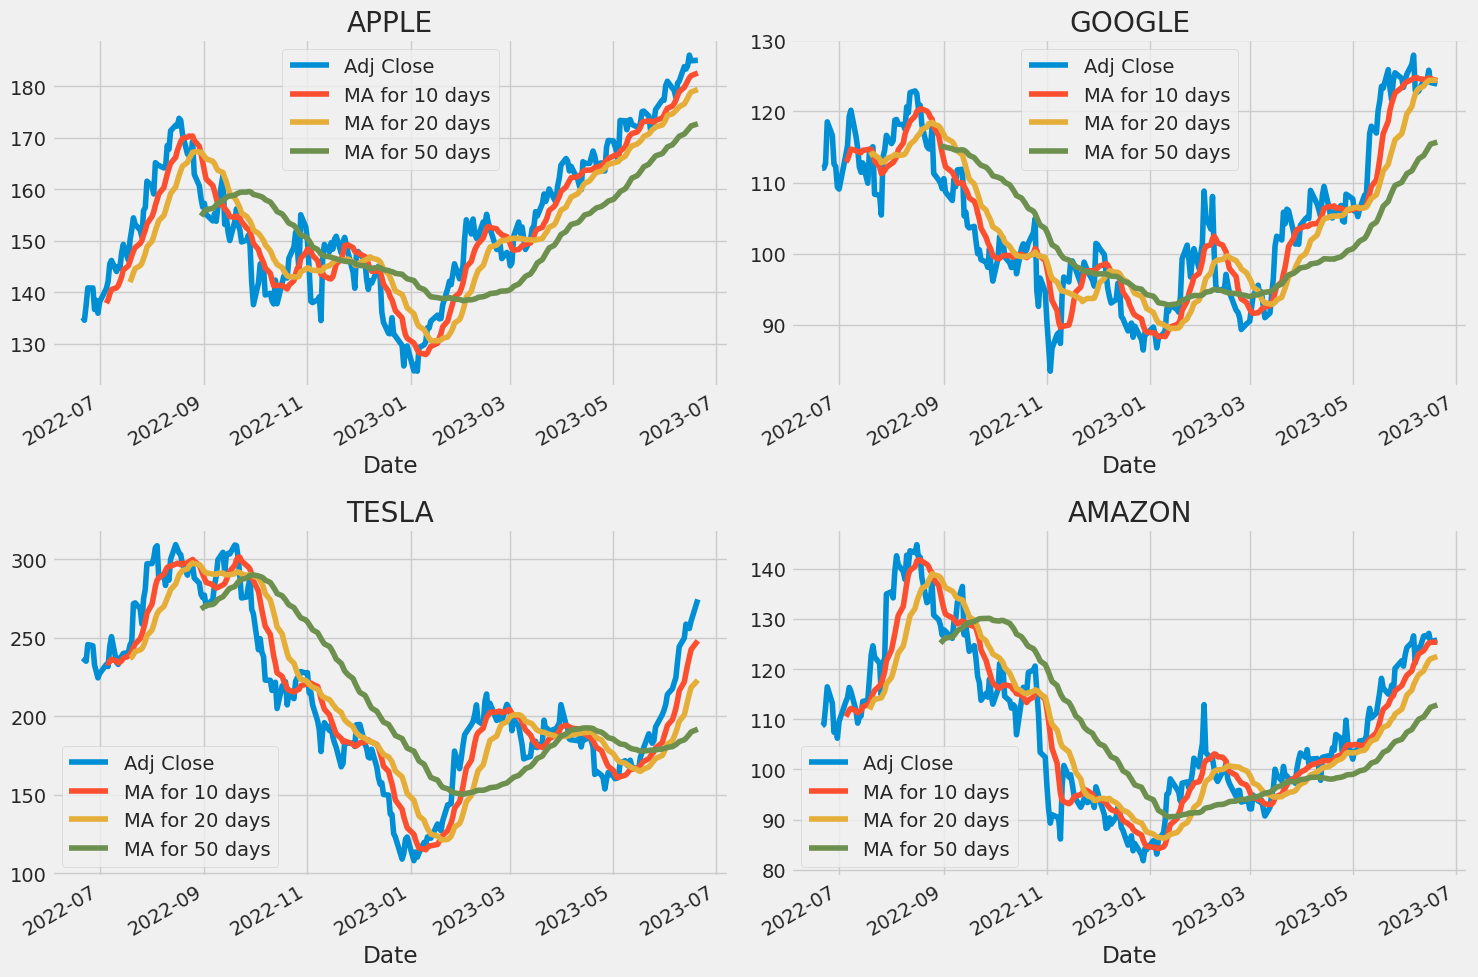

In [81]:
ma_day = [10,20,50]

for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close']. rolling(ma).mean()

fig,axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]. plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]. plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]. plot(ax=axes[1,0])
axes[1,0].set_title('TESLA')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]. plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Finding average daily return of stock

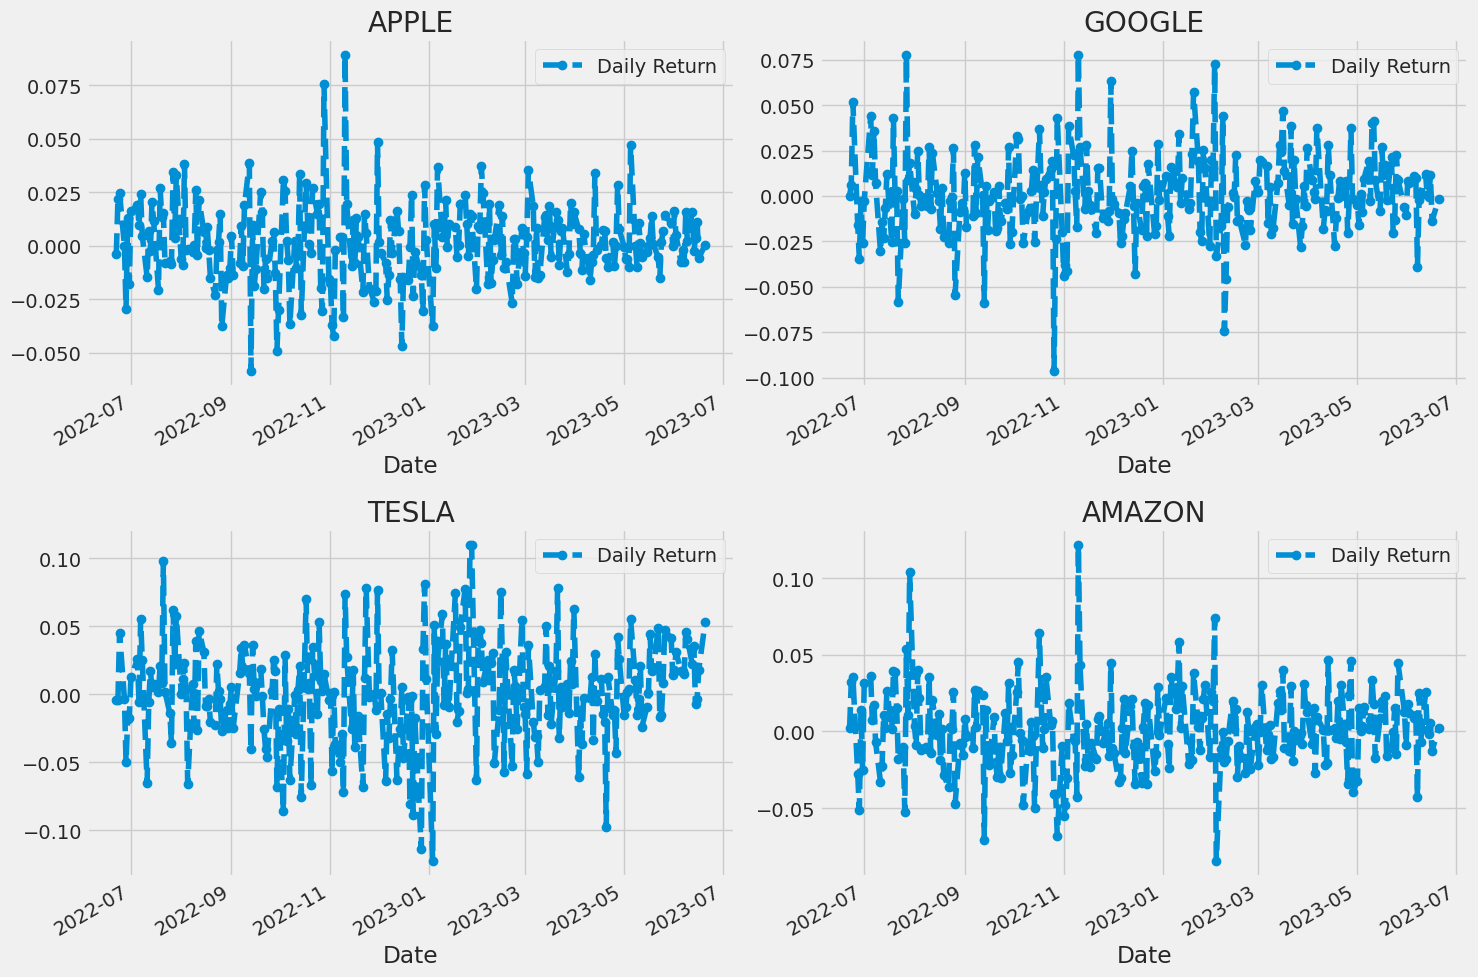

In [82]:
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

  #plotting daily return %age

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend= True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

TSLA['Daily Return']. plot(ax=axes[1,0], legend= True, linestyle='--', marker='o')
axes[1,0].set_title('TESLA')

AMZN['Daily Return'].plot(ax=axes[1,1], legend= True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Let's put this in a histogram!

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

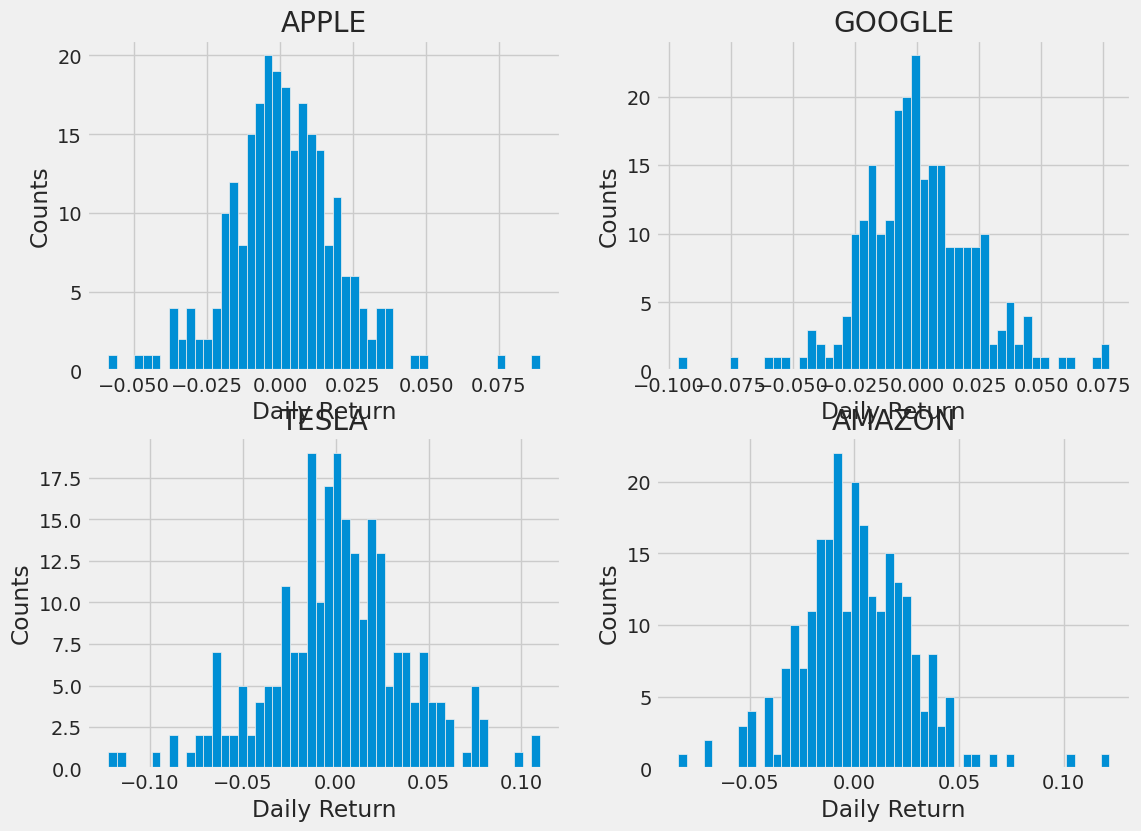

In [83]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')

plt.tight_layout


Use Pandas data reader to get all closing prices and load into a data frame

In [84]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

tech_ret = closing_df.pct_change()
tech_ret.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,TSLA
Date,,,,
2022-06-21,NaN,NaN,NaN,NaN
2022-06-22,-0.003827,0.002484,0.000170,-0.004008
2022-06-23,0.021574,0.032033,0.005806,-0.004306
2022-06-24,0.024517,0.035752,0.051946,0.045249
2022-06-27,0.000000,-0.027821,-0.016159,-0.003202


Checking correlation of stocks using seaborn

Heatmaps

Text(0.5, 1.0, 'Correlation of stock closing price')

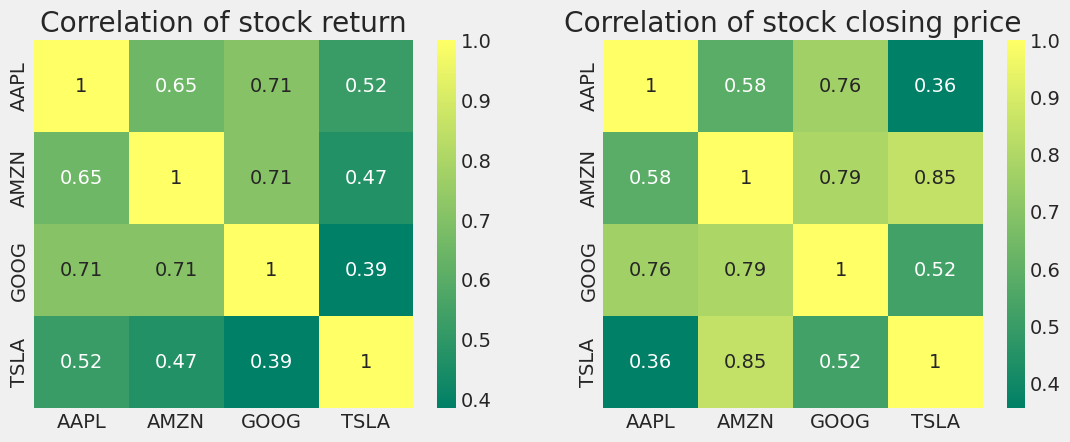

In [85]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(tech_ret.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Pairplots

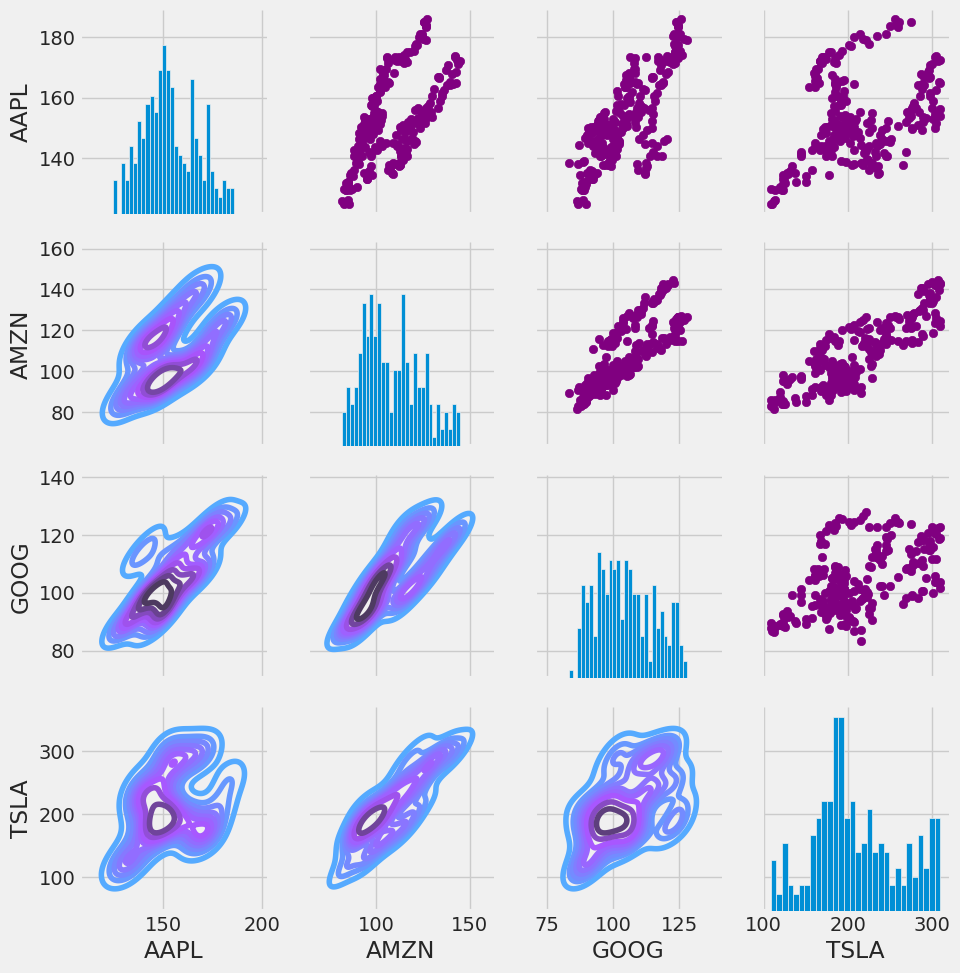

In [86]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)